In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.isna().sum()

ConvertedCompYearly         0
Age                         8
YearsCode                  11
YearsCodePro               20
Country                     0
EdLevel                     0
DevType                     4
Employment                  0
LanguageHaveWorkedWith      0
DatabaseHaveWorkedWith      0
PlatformHaveWorkedWith      0
WebframeHaveWorkedWith      0
ToolsTechHaveWorkedWith     0
dtype: int64

In [3]:
data['YearsCodePro'] = data['YearsCodePro'].str.extract(r'(\d+)') 
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')  
max(data['YearsCodePro'])

50.0

In [4]:
# Shuffle các hàng trong DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
len(data[data['YearsCodePro'].isna()])


20

In [7]:
data = data.dropna(subset=['YearsCodePro'])

In [8]:
data[data['EdLevel'].isna()]

Empty DataFrame
Columns: [ConvertedCompYearly, Age, YearsCode, YearsCodePro, Country, EdLevel, DevType, Employment, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, ToolsTechHaveWorkedWith]
Index: []

In [9]:
data[data['Country'].isna()]

Empty DataFrame
Columns: [ConvertedCompYearly, Age, YearsCode, YearsCodePro, Country, EdLevel, DevType, Employment, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, ToolsTechHaveWorkedWith]
Index: []

In [10]:
data[data['Employment'].isna()]

Empty DataFrame
Columns: [ConvertedCompYearly, Age, YearsCode, YearsCodePro, Country, EdLevel, DevType, Employment, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, ToolsTechHaveWorkedWith]
Index: []

In [11]:
data.dtypes

ConvertedCompYearly        float64
Age                         object
YearsCode                   object
YearsCodePro               float64
Country                     object
EdLevel                     object
DevType                     object
Employment                  object
LanguageHaveWorkedWith      object
DatabaseHaveWorkedWith      object
PlatformHaveWorkedWith      object
WebframeHaveWorkedWith      object
ToolsTechHaveWorkedWith     object
dtype: object

In [12]:
import re

def extract_average_age(age_str):
    if isinstance(age_str, str):
        match = re.match(r'(\d+)-(\d+)', age_str)
        if match:
            lower, upper = map(int, match.groups())
            if ((lower + upper)/2) %2==0 :
                return ((lower + upper) / 2)
            else:
                return (lower+upper)/2+0.5
    return None 

data['Age'] = data['Age'].apply(extract_average_age)


In [13]:
data = data.dropna() #về sau sửa đoạn này

In [14]:
data['YearsCode'] = data['YearsCode'].str.extract(r'(\d+)') 
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')  

Vẽ biểu đồ và phân tích

In [15]:
data

ConvertedCompYearly   Age  YearsCode  YearsCodePro  \
0                 69804.0  40.0         20          13.0   
1                144842.0  30.0         10           8.0   
2                 41363.0  30.0         11           5.0   
3                 40814.0  40.0         25          20.0   
4                192761.0  40.0         25          15.0   
...                   ...   ...        ...           ...   
3995              34692.0  30.0          6           5.0   
3996              85000.0  30.0         17           9.0   
3997              80172.0  30.0          8           5.0   
3998             121429.0  40.0         18          10.0   
3999              53703.0  21.5          5           2.0   

                                                Country  \
0     United Kingdom of Great Britain and Northern I...   
1                                           Switzerland   
2     United Kingdom of Great Britain and Northern I...   
3                                               Germany   
4                                                Serbia   
...                                                 ...   
3995                                             Poland   
3996                                           Viet Nam   
3997                                          Australia   
3998                                             Israel   
3999                                            Austria   

                                              EdLevel  \
0        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3                 Associate degree (A.A., A.S., etc.)   
4     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                               ...   
3995                                   Something else   
3996  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3997     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3998     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3999     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                                DevType  \
0                                   Developer, back-end   
1                                 Developer, full-stack   
2                                        Engineer, data   
3                                 Developer, full-stack   
4                                   Developer, back-end   
...                                                 ...   
3995                               Developer, front-end   
3996  Developer, back-end;Developer, desktop or ente...   
3997  Developer, full-stack;Developer, QA or test;De...   
3998                                Developer, back-end   
3999                              Developer, full-stack   

                                             Employment  \
0                                    Employed full-time   
1                                   Employed, full-time   
2                                    Employed full-time   
3     Employed, full-time;Independent contractor, fr...   
4                                   Employed, full-time   
...                                                 ...   
3995                                Employed, full-time   
3996  Employed, full-time;Independent contractor, fr...   
3997                                 Employed full-time   
3998                                Employed, full-time   
3999                                Employed, full-time   

                                 LanguageHaveWorkedWith  \
0     ['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...   
1     ['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...   
2     ['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...   
3     ['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...   
4                                              ['Rust']   
...                                                 ...   
3995                         ['HTML/CSS', 'JavaScript']   
3

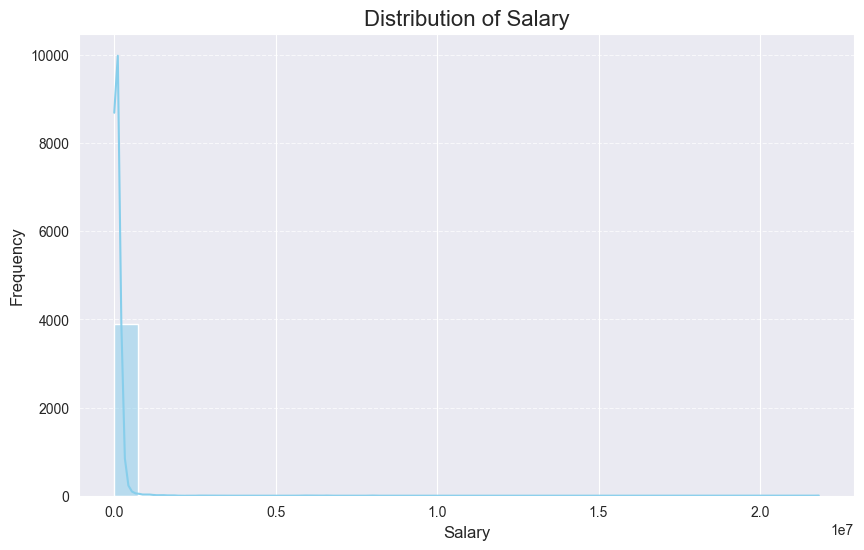

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:

data = data.rename(columns={'ConvertedCompYearly': 'Salary'})
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 12000:
    lower_bound = 12000

In [18]:
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


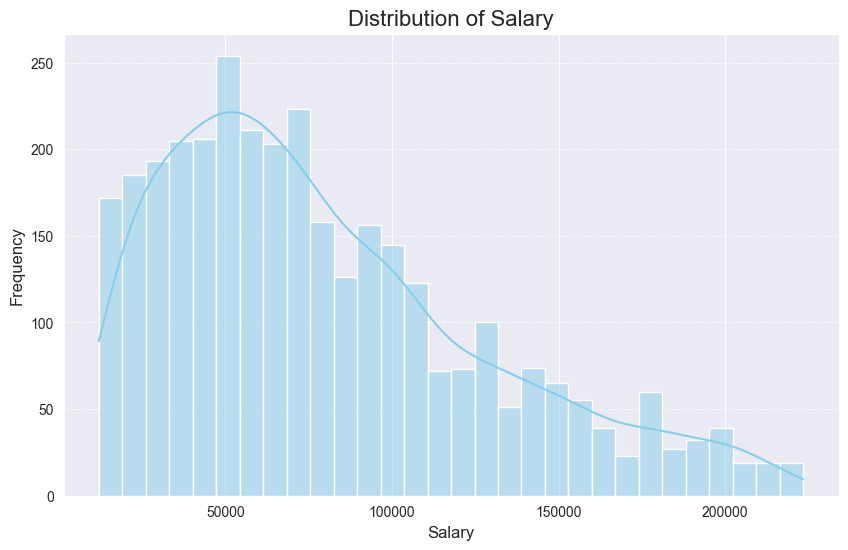

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\4050174525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


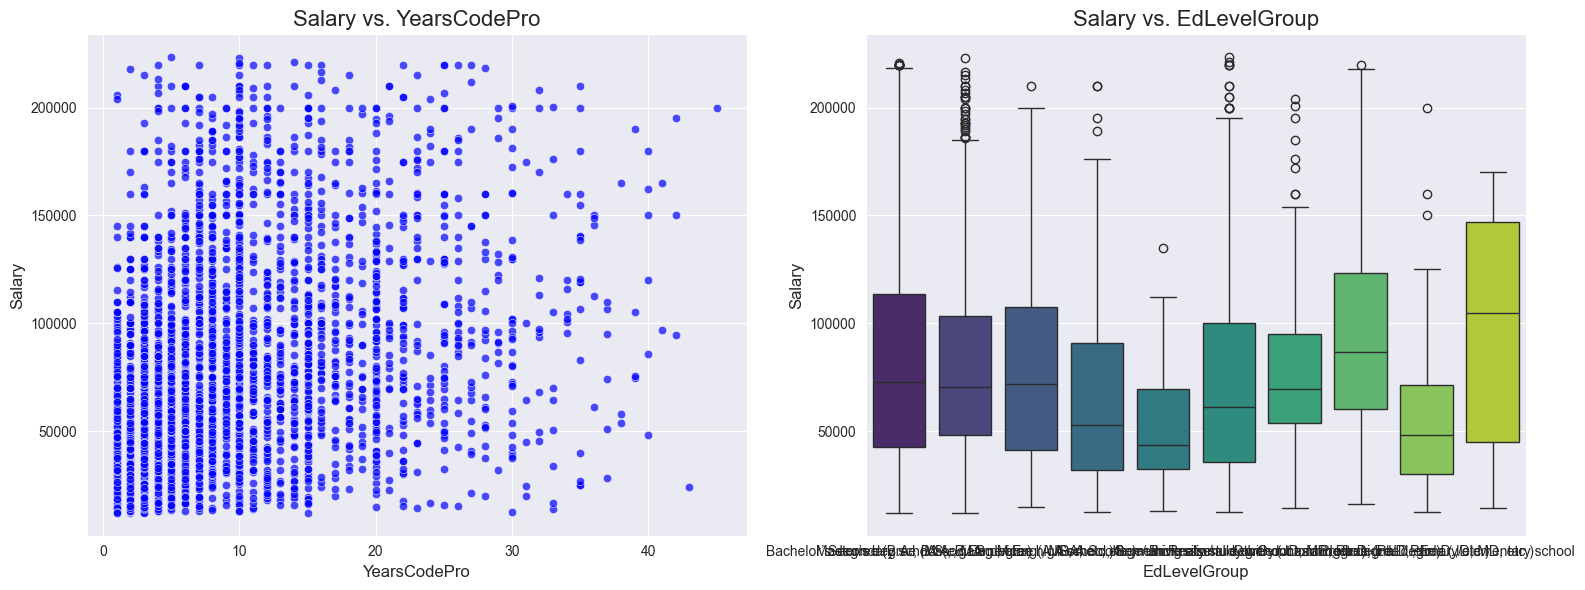

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [22]:

invalid_experience = (data['YearsCode'] > data['Age'] - 15) | \
                     (data['YearsCode'] < 0) | \
                     (data['YearsCode'] > 50)|\
                    (data['YearsCodePro'] > data['YearsCode'])

print(f"Số hàng bất hợp lý trong YearsCodePro: {invalid_experience.sum()}")
data = data[~invalid_experience]

Số hàng bất hợp lý trong YearsCodePro: 668


In [23]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [24]:
edlevel_map = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree',
    'Something else': 'Other',
    'Some college/university study without earning a degree': 'Some college',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
    'Professional degree (JD, MD, etc.)': 'Professional degree',
    'Primary/elementary school': 'Primary school'
}

# Thay thế các giá trị trong cột EdLevel bằng nhóm tương ứng
data['EdLevel'] = data['EdLevel'].map(edlevel_map)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2254231722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


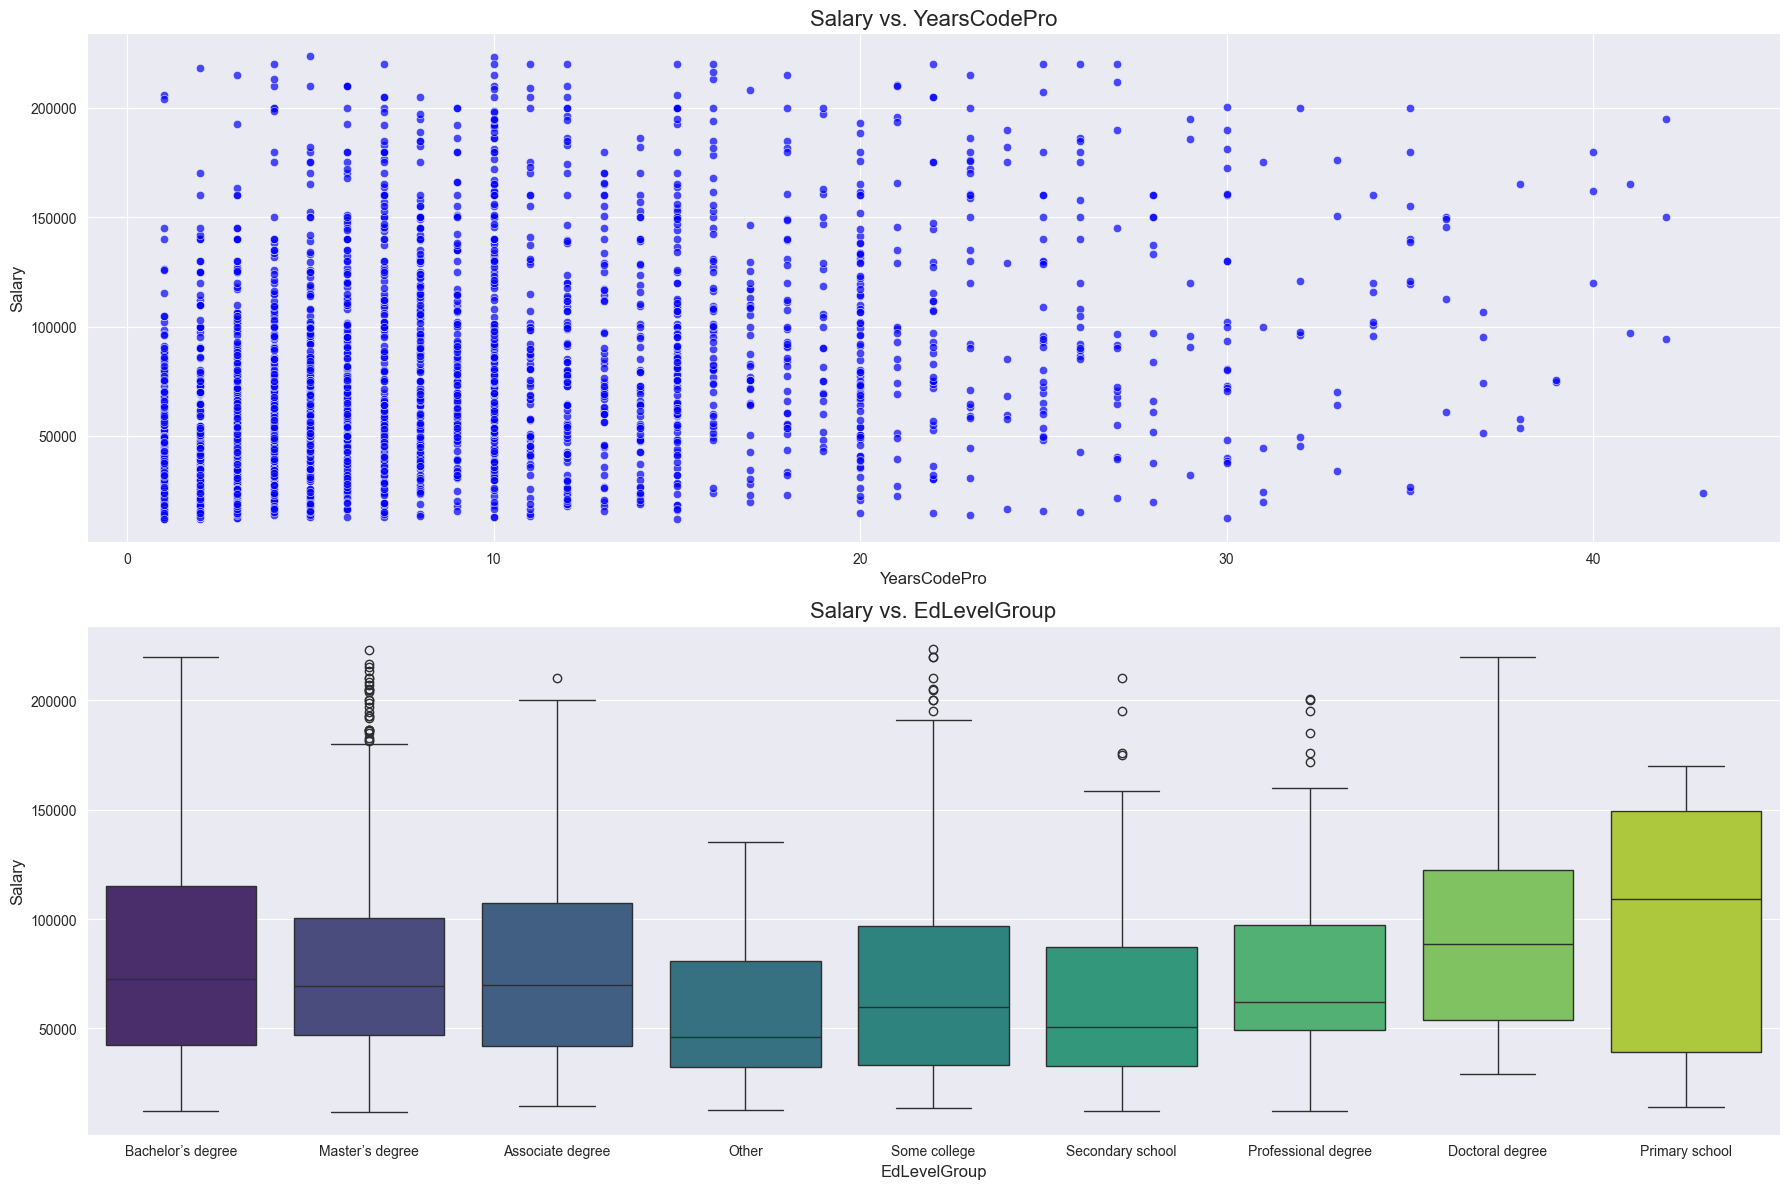

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # Chỉnh số lượng hàng và cột
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)

sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [26]:
data['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Associate degree',
       'Other', 'Some college', 'Secondary school', 'Professional degree',
       'Doctoral degree', 'Primary school'], dtype=object)

Nhớ sửa phần này

In [27]:
primary_school_salary = data[data['EdLevel'] == 'Primary school']

# Xóa tất cả các giá trị lương lớn hơn 10,000 trong nhóm này
data = data[~((data['EdLevel'] == 'Primary school'))] # & (data['Salary'] > 120000))]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\522407641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')


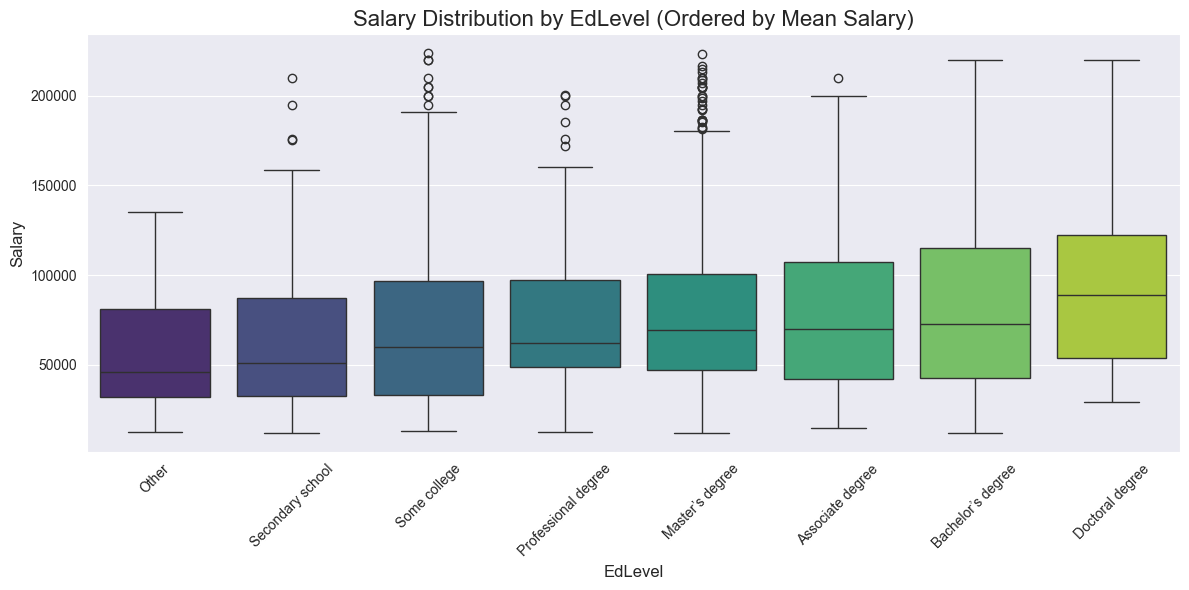

In [28]:
salary_by_edlevel = data.groupby('EdLevel')['Salary'].mean().sort_values()

# Vẽ biểu đồ boxplot với thứ tự các nhóm đã sắp xếp
plt.figure(figsize=(12, 6))
sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')
plt.title('Salary Distribution by EdLevel (Ordered by Mean Salary)', fontsize=16)
plt.xlabel('EdLevel', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# Kiểm tra số lượng mẫu trong mỗi nhóm
data['EdLevel'].value_counts()


EdLevel
Bachelor’s degree      1241
Master’s degree         742
Some college            299
Secondary school        114
Associate degree        102
Professional degree      84
Doctoral degree          38
Other                    27
Name: count, dtype: int64

In [30]:
# data[data['EdLevel'] == 'Primary school']['Salary']

In [31]:
# Kiểm tra các giá trị lương trong nhóm "Primary school"
# primary_school_salary = data[data['EdLevel'] == 'Primary school']['Salary']
# primary_school_salary.describe()


In [32]:
data['DevType'] = data['DevType'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['DevType'] = data['DevType'].str.split(";")

In [33]:
data['DevType']

0                                    [Developer back-end]
1                                  [Developer full-stack]
2                                         [Engineer data]
3                                  [Developer full-stack]
4                                    [Developer back-end]
                              ...                        
3994    [Developer front-end, Developer full-stack, De...
3995                                [Developer front-end]
3997    [Developer full-stack, Developer QA or test, D...
3998                                 [Developer back-end]
3999                               [Developer full-stack]
Name: DevType, Length: 2647, dtype: object

In [34]:
data['Employment']

0                                      Employed full-time
1                                     Employed, full-time
2                                      Employed full-time
3       Employed, full-time;Independent contractor, fr...
4                                     Employed, full-time
                              ...                        
3994                                  Employed, full-time
3995                                  Employed, full-time
3997                                   Employed full-time
3998                                  Employed, full-time
3999                                  Employed, full-time
Name: Employment, Length: 2647, dtype: object

In [35]:
data['Employment'] = data['Employment'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['Employment'] = data['Employment'].str.split(";")

In [36]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3       [Employed full-time, Independent contractor fr...
4                                    [Employed full-time]
                              ...                        
3994                                 [Employed full-time]
3995                                 [Employed full-time]
3997                                 [Employed full-time]
3998                                 [Employed full-time]
3999                                 [Employed full-time]
Name: Employment, Length: 2647, dtype: object

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\1522501265.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")


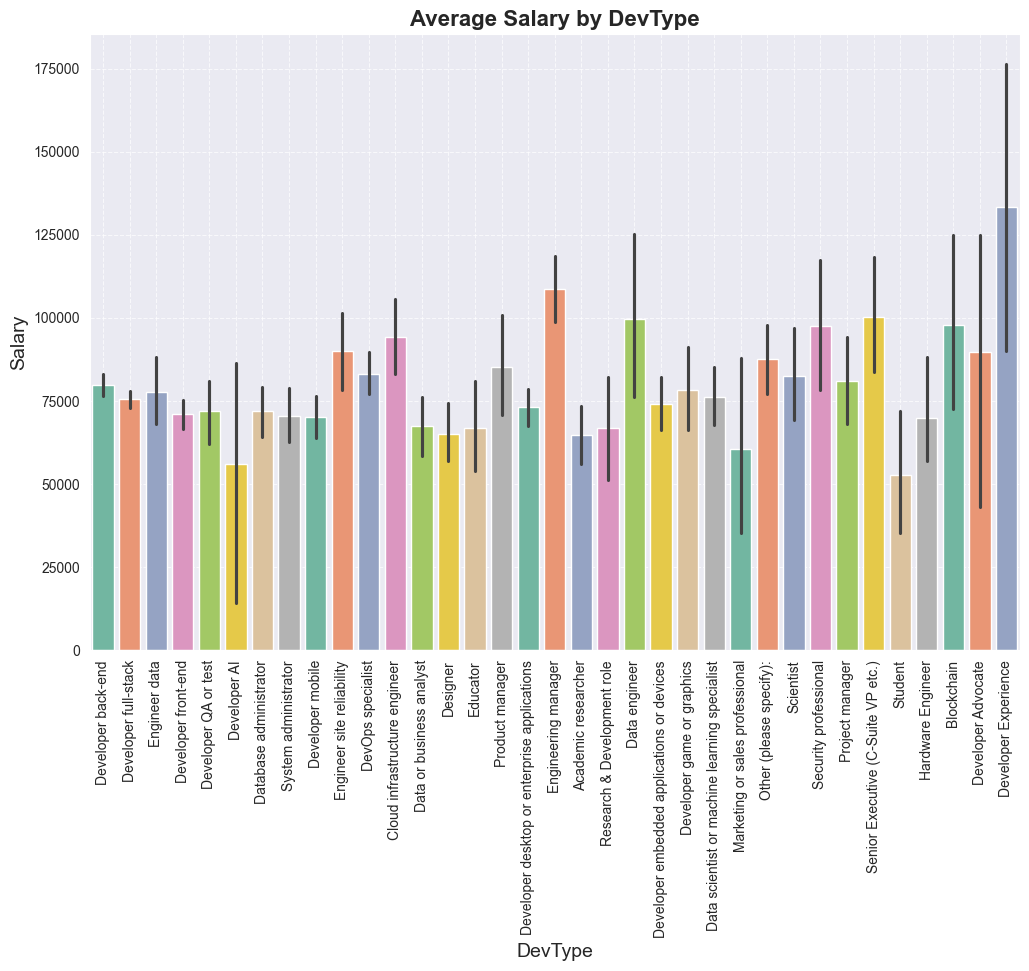

In [37]:
devtype_expanded = data.explode('DevType')
expanded_data = data.explode('DevType')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by DevType', fontsize=16, weight='bold')
plt.xlabel('DevType', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\904186539.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


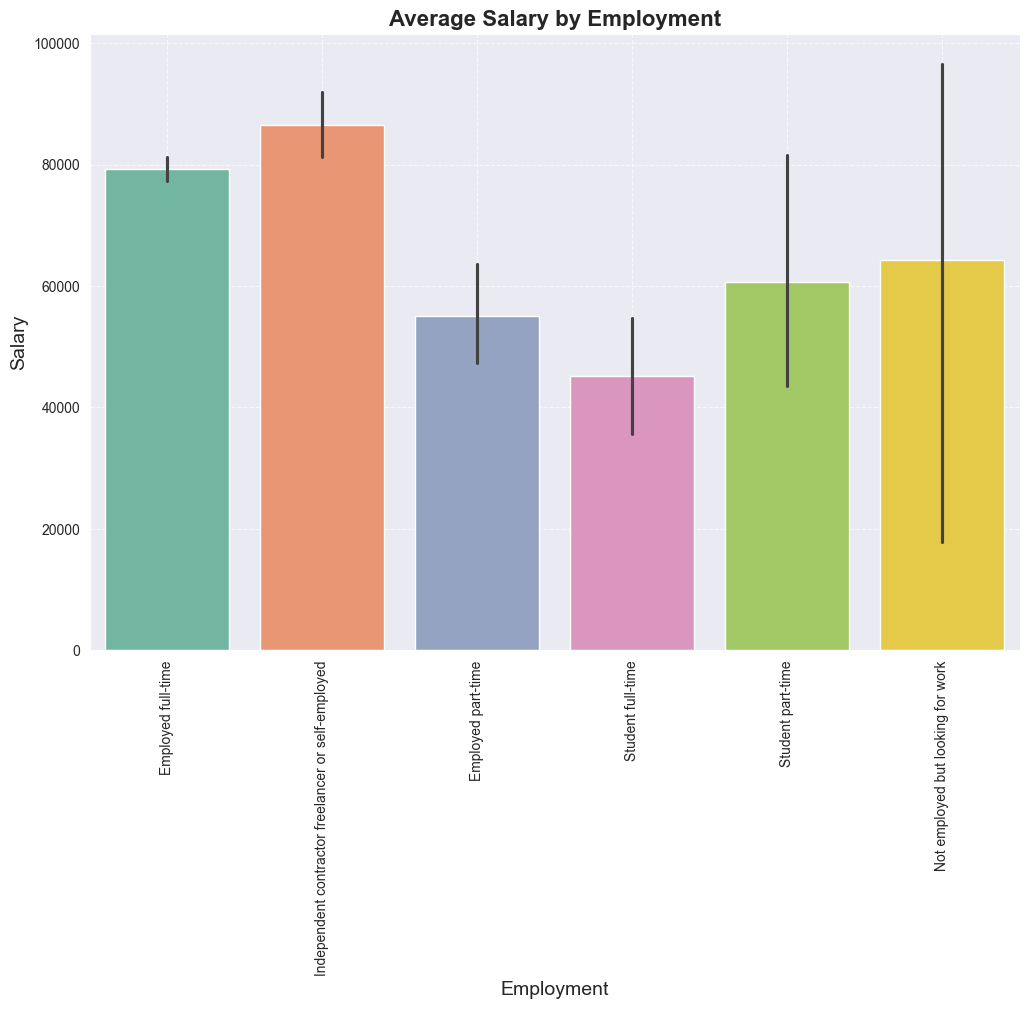

In [38]:

expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

Dữ liệu đang có vấn đề ....

In [39]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3       [Employed full-time, Independent contractor fr...
4                                    [Employed full-time]
                              ...                        
3994                                 [Employed full-time]
3995                                 [Employed full-time]
3997                                 [Employed full-time]
3998                                 [Employed full-time]
3999                                 [Employed full-time]
Name: Employment, Length: 2647, dtype: object

In [40]:
data.drop(data[data['Employment'].apply(lambda x: "Not employed but looking for work" in x)].index, inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\3663163829.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


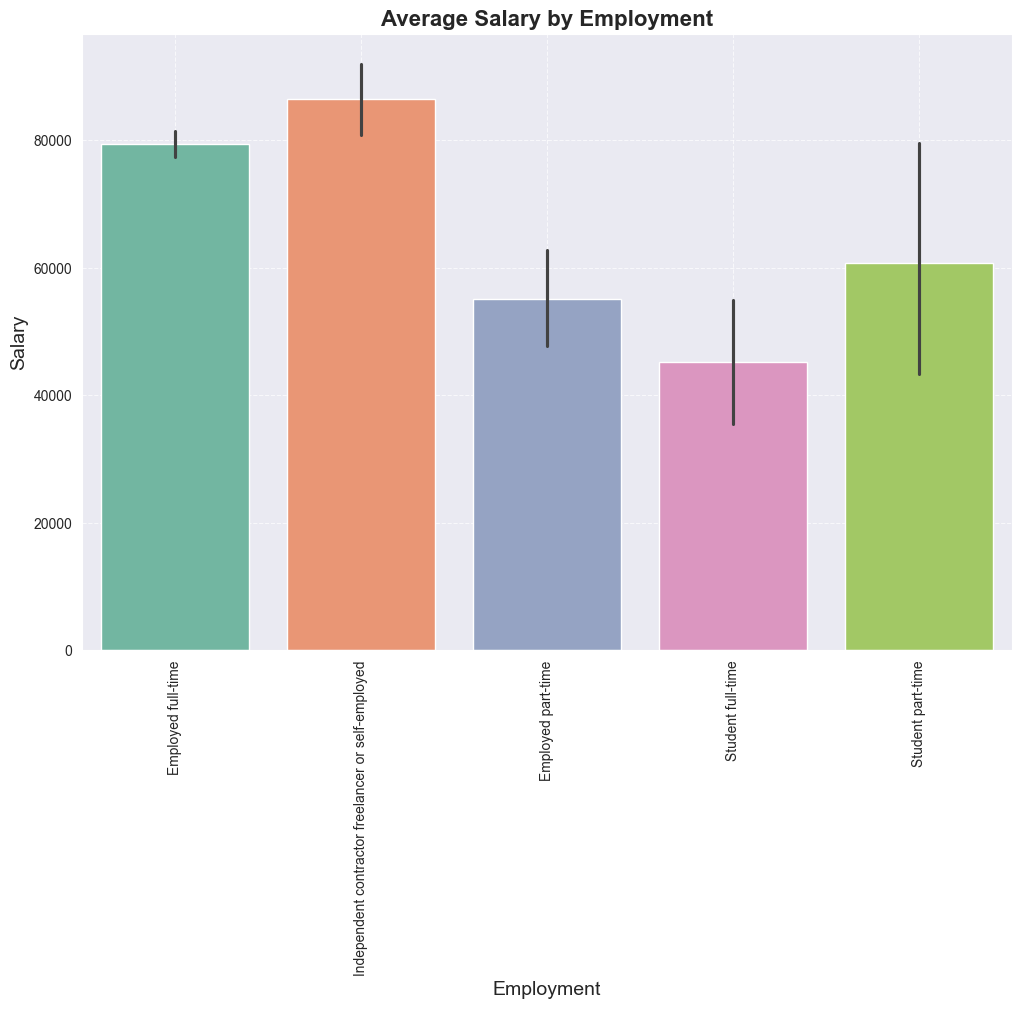

In [41]:
expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

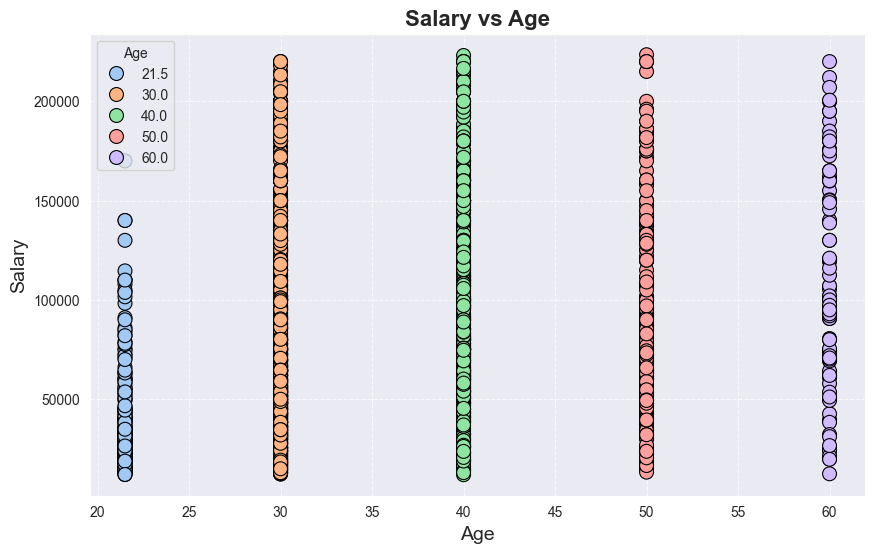

In [42]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(10, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Age', y='Salary', hue='Age', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [43]:
# Combine all relevant columns into a single 'skills' column
skills_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

# Remove 'NaN' and combine lists while deduplicating
def combine_skills(row):
    combined = []
    for col in skills_columns:
        if pd.notna(row[col]):  # Check if the column is not NaN
            combined.extend(eval(row[col]))  # Convert string representation of lists to actual lists
    return list(set(combined))  # Remove duplicates

data["skills"] = data.apply(combine_skills, axis=1)

data


Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
3994   74651.0  40.0         18          12.0   
3995   34692.0  30.0          6           5.0   
3997   80172.0  30.0          8           5.0   
3998  121429.0  40.0         18          10.0   
3999   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
3994                                            Germany    Master’s degree   
3995                                             Poland              Other   
3997                                          Australia  Bachelor’s degree   
3998                                             Israel  Bachelor’s degree   
3999                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
3994  [Developer front-end, Developer full-stack, De...   
3995                              [Developer front-end]   
3997  [Developer full-stack, Developer QA or test, D...   
3998                               [Developer back-end]   
3999                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
3994                               [Employed full-time]   
3995                               [Employed full-time]   
3997                               [Employed full-time]   
3998                               [Employed full-time]   
3999                               [Employed full-time]   

                                 LanguageHaveWorkedWith  \
0     ['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...   
1     ['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...   
2     ['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...   
3     ['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...   
4                                              ['Rust']   
...                                                 ...   
3994                      ['Java', 'JavaScript', 'SQL']   
3995                         ['HTML/CSS', 'JavaScript']   
3997  ['JavaScript', 'Kotlin', 'Node.js', 'Python', ...   
3998  ['Bash/Shell (all shells)', 'Groovy', 'JavaScr...   
3999    ['Dart', 'Kotlin', 'Rust', 'SQL', 'TypeScript']   

                                 DatabaseHaveWorkedWith  \
0                                   ['Redis', 'SQLite']   
1                                        ['PostgreSQL']   
2                                                    []   
3                              ['Microsoft SQL Server']   
4                                        ['PostgreSQL']   
.

MÔ HÌNH TUYẾN TÍNH: Logistic Regression, Linear Regression, SVM với kernel tuyến tính

In [44]:
data = data.drop(columns = ['LanguageHaveWorkedWith',"DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",])

Mã hóa

In [45]:
df1 = data

In [46]:
df1['DevType']

0                                    [Developer back-end]
1                                  [Developer full-stack]
2                                         [Engineer data]
3                                  [Developer full-stack]
4                                    [Developer back-end]
                              ...                        
3994    [Developer front-end, Developer full-stack, De...
3995                                [Developer front-end]
3997    [Developer full-stack, Developer QA or test, D...
3998                                 [Developer back-end]
3999                               [Developer full-stack]
Name: DevType, Length: 2644, dtype: object

Mã hóa cho DevType

In [47]:
all_dev_types = set([dev for sublist in df1['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df1[dev_type] = df1['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [48]:
df1 

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
3994   74651.0  40.0         18          12.0   
3995   34692.0  30.0          6           5.0   
3997   80172.0  30.0          8           5.0   
3998  121429.0  40.0         18          10.0   
3999   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
3994                                            Germany    Master’s degree   
3995                                             Poland              Other   
3997                                          Australia  Bachelor’s degree   
3998                                             Israel  Bachelor’s degree   
3999                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
3994  [Developer front-end, Developer full-stack, De...   
3995                              [Developer front-end]   
3997  [Developer full-stack, Developer QA or test, D...   
3998                               [Developer back-end]   
3999                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
3994                               [Employed full-time]   
3995                               [Employed full-time]   
3997                               [Employed full-time]   
3998                               [Employed full-time]   
3999                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
3994  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
3995  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
3997  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
3998  [Amazon Web Services (AWS), Groovy, Kubernetes...   
3999  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Developer AI  Hardware Engineer  \
0                          0  ...             0                  0   
1                          0  ...             0                  0   
2                          0  ...             0                  0   
3                          0  ...             0                  0   
4    

In [49]:
df1 = df1.reset_index(drop=True)

Mã hóa EdLevelGroup

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['EdLevel']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['EdLevel']))

df1 = pd.concat([df1, encoded_df], axis=1)

df1

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Developer QA or test  \
0                          0  ...                     0   
1                          0  ...                     0   
2                          0  ...                     0   
3                          0  ...                     0   
4                          0  ...                     0   
.

Mã hóa cho Age (dữ liệu trung bình nhóm tuổi vd 18-24 21)

In [52]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  EdLevel_Master’s degree  EdLevel_Other  \
0                          0  ...                      0.0            0.0   
1                          0  ...                      0.0            0.0   
2                          0  ...                      1.0            0.0   
3                          0  ...              

In [53]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Country_Uganda  Country_Ukraine  \
0                          0  ...             0.0              0.0   
1                          0  ...             0.0              0.0   
2                          0  ...             0.0              0.0   
3                          0  ...             0.0              0.0   
4    

In [54]:
all_employment_types = set([item for sublist in df1['Employment'] for item in sublist])

for employment_type in all_employment_types:
    df1[employment_type] = df1['Employment'].apply(lambda x: 1 if employment_type in x else 0)


In [55]:
df1

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Country_Uruguay  Country_Uzbekistan  \
0                          0  ...              0.0                 0.0   
1                          0  ...              0.0                 0.0   
2                          0  ...              0.0                 0.0   
3                          0  ...              0.0         

In [56]:
all_skills = set([item for sublist in df1['skills'] for item in sublist])

for skill in all_skills:
    df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\610394083.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\610394083.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\610394083.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [57]:
df1 = df1.drop(columns = ['Country','Age','DevType','Employment','skills'])

In [58]:
df1

Salary  YearsCode  YearsCodePro            EdLevel  \
0      69804.0         20          13.0  Bachelor’s degree   
1     144842.0         10           8.0  Bachelor’s degree   
2      41363.0         11           5.0    Master’s degree   
3      40814.0         25          20.0   Associate degree   
4     192761.0         25          15.0    Master’s degree   
...        ...        ...           ...                ...   
2639   74651.0         18          12.0    Master’s degree   
2640   34692.0          6           5.0              Other   
2641   80172.0          8           5.0  Bachelor’s degree   
2642  121429.0         18          10.0  Bachelor’s degree   
2643   53703.0          5           2.0  Bachelor’s degree   

      Database administrator  Other (please specify):  Educator  \
0                          0                        0         0   
1                          0                        0         0   
2                          0                        0         0   
3                          0                        0         0   
4                          0                        0         0   
...                      ...                      ...       ...   
2639                       0                        0         0   
2640                       0                        0         0   
2641                       0                        0         0   
2642                       0                        0         0   
2643                       0                        0         0   

      Cloud infrastructure engineer  Academic researcher  Data engineer  ...  \
0                                 0                    0              0  ...   
1                                 0                    0              0  ...   
2                                 0                    0              0  ...   
3                                 0                    0              0  ...   
4                                 0                    0              0  ...   
...                             ...                  ...            ...  ...   
2639                              0                    0              0  ...   
2640                              0                    0              0  ...   
2641                              0                    0              0  ...   
2642                              0                    0              0  ...   
2643                              0                    0              0  ...   

      BigQuery  Prolog  Crystal  Webpack  VMware  CMake  cppunit  GNU GCC  \
0            0       0        0        0       0      0        0        0   
1            0       0        0        0       0      0        0        0   
2            0       0        0        0       0      0        0        0   
3            0       0        0        0       0      0        0        0   
4            0       0        0        0       0      0        0        0   
...        ...     ...      ...      ...     ...    ...      ...      ...   
2639         0       0        0        0       0      0        0        0   
2640         0       0        0        0       0      0        0        0   
2641         0       0        0        0       0      0        0        0   
2642         0       0        0        0       0      0        0        0   
2643         0       0        0        0       0      0        0        0   

      HTML/CSS  DynamoDB  
0            1         0  
1            1         0  
2            0         0  
3            1         0  
4            0         0  
...        ...       ...  
2639         0         0  
2640         1         0  
2641         0         0  
2642         0         0  
2643         0         0  

[2644 rows x 378 columns]

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df1.drop(columns=['EdLevel'])  
y = df1['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df1.iloc[train_idx]
    temp_data = df1.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2115
Kích thước val: 264
Kích thước test: 265


In [60]:
train_data

Salary  YearsCode  YearsCodePro            EdLevel  \
20    101311.0         15           5.0              Other   
554    64499.0         30          23.0  Bachelor’s degree   
1373   80000.0          6           4.0   Associate degree   
1549   20363.0         15           9.0  Bachelor’s degree   
1524   58992.0         20          14.0  Bachelor’s degree   
...        ...        ...           ...                ...   
72     24288.0         12           7.0  Bachelor’s degree   
580    25860.0          6           1.0       Some college   
349    15036.0         10           7.0  Bachelor’s degree   
311    57999.0         11           6.0    Master’s degree   
1249   31410.0          2           1.0   Secondary school   

      Database administrator  Other (please specify):  Educator  \
20                         1                        0         1   
554                        0                        0         0   
1373                       0                        0         0   
1549                       0                        0         0   
1524                       0                        0         0   
...                      ...                      ...       ...   
72                         0                        0         0   
580                        0                        0         0   
349                        0                        0         0   
311                        0                        0         0   
1249                       0                        0         0   

      Cloud infrastructure engineer  Academic researcher  Data engineer  ...  \
20                                0                    0              0  ...   
554                               0                    0              0  ...   
1373                              0                    0              0  ...   
1549                              0                    0              0  ...   
1524                              0                    0              0  ...   
...                             ...                  ...            ...  ...   
72                                0                    0              0  ...   
580                               0                    0              0  ...   
349                               0                    0              0  ...   
311                               0                    0              0  ...   
1249                              0                    0              0  ...   

      BigQuery  Prolog  Crystal  Webpack  VMware  CMake  cppunit  GNU GCC  \
20           0       0        0        0       0      0        0        0   
554          0       0        0        0       0      0        0        0   
1373         0       0        0        0       0      0        0        0   
1549         0       0        0        0       0      0        0        0   
1524         0       0        0        0       0      0        0        0   
...        ...     ...      ...      ...     ...    ...      ...      ...   
72           0       0        0        0       0      0        0        0   
580          0       0        0        0       0      0        0        0   
349          0       0        0        0       0      0        0        0   
311          0       0        0        0       0      0        0        0   
1249         0       0        0        0       0      0        0        0   

      HTML/CSS  DynamoDB  
20           1         0  
554          0         0  
1373         0         0  
1549         1         0  
1524         1         0  
...        ...       ...  
72           1         0  
580          1         0  
349          0         0  
311          0         0  
1249         1         0  

[2115 rows x 378 columns]

In [61]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])


In [63]:
train_data = train_data.drop('EdLevel',axis=1)
val_data = val_data.drop('EdLevel',axis=1)
test_data = test_data.drop('EdLevel',axis=1)

In [64]:
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)

In [65]:
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

In [66]:
X_val

YearsCode  YearsCodePro  Database administrator  Other (please specify):  \
0    -0.085101     -0.191657                       0                        0   
1    -0.204379     -0.058841                       0                        0   
2     0.869117      0.472422                       1                        0   
3    -0.204379     -0.058841                       0                        0   
4    -0.323656     -0.324472                       0                        0   
..         ...           ...                     ...                      ...   
259  -0.800765     -0.457288                       0                        0   
260  -0.681488     -0.590104                       0                        0   
261  -0.323656      0.073975                       0                        0   
262   1.107671      1.800579                       0                        0   
263  -1.039319     -0.855735                       0                        0   

     Educator  Cloud infrastructure engineer  Academic researcher  \
0           0                              0                    1   
1           0                              0                    0   
2           0                              0                    0   
3           0                              0                    0   
4           0                              0                    0   
..        ...                            ...                  ...   
259         0                              0                    0   
260         0                              0                    0   
261         0                              0                    0   
262         0                              0                    0   
263         0                              0                    0   

     Data engineer  Scientist  DevOps specialist  ...  BigQuery  Prolog  \
0                0          0                  0  ...         0       0   
1                0          0                  0  ...         0       0   
2                0          0                  1  ...         0       0   
3                0          0                  0  ...         0       0   
4                0          0                  0  ...         0       0   
..             ...        ...                ...  ...       ...     ...   
259              0          0                  0  ...         0       0   
260              0          0                  0  ...         0       0   
261              0          0                  1  ...         0       0   
262              0          0                  0  ...         0       0   
263              0          0                  0  ...         0       0   

     Crystal  Webpack  VMware  CMake  cppunit  GNU GCC  HTML/CSS  DynamoDB  
0          0        0       0      0        0        0         1         0  
1          0        0       0      0        0        0         0         0  
2          0        0       0      0        0        0         1         0  
3          0        0       0      0        0        0         0         0  
4          0        0       0      0        0        0         1         0  
..       ...      ...     ...    ...      ...      ...       ...       ...  
259        0        1       0      0        0        0         1         0  
260        0        0       0      0        0        0         0         0  
261        0        0       0      0        0        0         0         0  
262        0        0       0      0        0        0         1         0  
263        0        0       0      0        0        0         0         0  

[264 rows x 376 columns]

Linear Regresion

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Linear Regression: {mae}')
print(f'RMSE of Linear Regression: {rmse}')
print(f'R^2 of Linear Regression: {r2}')


MAE of Linear Regression: 26408.954545454544
RMSE of Linear Regression: 34249.05444470052
R^2 of Linear Regression: 0.5173693278075904


SVM với Linear kernel

In [68]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')

svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_val)

# Đánh giá mô hình
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of SVM with Linear Kernel: {mae}')
print(f'RMSE of SVM with Linear Kernel: {rmse}')
print(f'R^2 of SVM with Linear Kernel: {r2}')


MAE of SVM with Linear Kernel: 39149.39817629235
RMSE of SVM with Linear Kernel: 51436.22209775621
R^2 of SVM with Linear Kernel: -0.08856877531613194


Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=21)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Ridge Regression: {mae}')
print(f'RMSE of Ridge Regression: {rmse}')
print(f'R^2 of Ridge Regression: {r2}')


MAE of Ridge Regression: 24806.51980548542
RMSE of Ridge Regression: 31698.363588233115
R^2 of Ridge Regression: 0.5865800481016807


In [70]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24328.509833364777
RMSE: 31124.467585762417
R²: 0.6014143956951112


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
svr = SVR(kernel = "rbf", C =2500000, epsilon = 0.02)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24931.66895055187
RMSE: 32663.821873376917
R²: 0.5610129143598196


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=600,learning_rate=0.06,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 205
[LightGBM] [Info] Start training from score 78779.734752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 26408.954545454544
RMSE: 34249.05444470052
R²: 0.5173693278075904


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Thêm các mô hình khác

In [75]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23221.629402454553
RMSE: 30016.79023919013
R²: 0.6292798026418962


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest

In [76]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE: 27156.985759950676
RMSE: 34664.12107924818
R²: 0.5056003746751485


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=900, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24824.570406529976
RMSE: 31715.739634596186
R²: 0.5861266762331547


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
svr = SVR(kernel = "rbf", C =2000000,epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24931.66972460319
RMSE: 32663.82195322044
R²: 0.5610129122136975


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 5997896595118.045
RMSE: 41141899394551.87
R²: -6.964443551838574e+17


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------------------------------------------

Mô hình dựa trên cây: Decision Tree, Random Forest, XGBoost, LightGBM

In [80]:
df2 = data

Mã hóa

In [81]:
df2 = df2.reset_index(drop=True)

In [82]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [83]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  \
0                          0  ...   
1                          0  ...   
2                          0  ...   
3                          0  ...   
4                          0  ...   
...                      ...  ...   
2639                       0  ...   
2640                       0  ...   
2641                  

In [84]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Country_Uganda  Country_Ukraine  \
0                          0  ...             0.0              0.0   
1                          0  ...             0.0              0.0   
2                          0  ...             0.0              0.0   
3                          0  ...             0.0              0.0   
4    

In [85]:
df2['Employment'].explode().unique()

array(['Employed full-time',
       'Independent contractor freelancer or self-employed',
       'Employed part-time', 'Student full-time', 'Student part-time'],
      dtype=object)

In [86]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [87]:
from sklearn.preprocessing import MultiLabelBinarizer

# Khởi tạo MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Mã hóa cột DevType
devtype_encoded = mlb.fit_transform(data['DevType'])
# Chuyển đổi kết quả thành DataFrame
devtype_encoded_df = pd.DataFrame(devtype_encoded, columns=mlb.classes_)

# Kết hợp vào dữ liệu gốc
df2 = pd.concat([df2, devtype_encoded_df], axis=1)

df2


Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country            EdLevel  \
0     United Kingdom of Great Britain and Northern I...  Bachelor’s degree   
1                                           Switzerland  Bachelor’s degree   
2     United Kingdom of Great Britain and Northern I...    Master’s degree   
3                                               Germany   Associate degree   
4                                                Serbia    Master’s degree   
...                                                 ...                ...   
2639                                            Germany    Master’s degree   
2640                                             Poland              Other   
2641                                          Australia  Bachelor’s degree   
2642                                             Israel  Bachelor’s degree   
2643                                            Austria  Bachelor’s degree   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Marketing or sales professional  \
0                          0  ...                                0   
1                          0  ...                                0   
2                          0  ...                                0   
3                          0  ...                                0   
4    

In [88]:
df2[df2['EdLevel'] == 'Secondary school']

Salary   Age  YearsCode  YearsCodePro  \
52    49056.0  40.0         25          14.0   
65    20407.0  30.0          7           2.0   
78    80555.0  30.0         10           8.0   
109   36000.0  30.0         13          13.0   
125   40944.0  30.0          1           1.0   
...       ...   ...        ...           ...   
2475  23803.0  30.0         11           4.0   
2504  38916.0  40.0         25          20.0   
2552  50481.0  21.5          6           4.0   
2623  42836.0  30.0          6           3.0   
2626  90000.0  40.0         19          19.0   

                                                Country           EdLevel  \
52                                              Germany  Secondary school   
65                                                Italy  Secondary school   
78                                              Germany  Secondary school   
109   United Kingdom of Great Britain and Northern I...  Secondary school   
125                                      Czech Republic  Secondary school   
...                                                 ...               ...   
2475                                           Viet Nam  Secondary school   
2504                                            Germany  Secondary school   
2552                                            Germany  Secondary school   
2623                                            Germany  Secondary school   
2626                                            Uruguay  Secondary school   

                                                DevType  \
52    [Developer front-end, Developer full-stack, De...   
65                                 [Developer back-end]   
78                               [Developer full-stack]   
109                              [Developer full-stack]   
125                              [Developer QA or test]   
...                                                 ...   
2475  [Developer front-end, Developer full-stack, De...   
2504       [Developer full-stack, Developer QA or test]   
2552                             [Developer full-stack]   
2623                               [Developer back-end]   
2626                                [DevOps specialist]   

                                             Employment  \
52                                 [Employed full-time]   
65                                 [Employed full-time]   
78                                 [Employed full-time]   
109                                [Employed full-time]   
125   [Independent contractor freelancer or self-emp...   
...                                                 ...   
2475                               [Employed full-time]   
2504                               [Employed full-time]   
2552                               [Employed full-time]   
2623                               [Employed full-time]   
2626                               [Employed full-time]   

                                                 skills  \
52    [MongoDB, Docker, SQL, AWS, Ruby, Laravel, Pyt...   
65    [Laravel, Next.js, npm, PHP, WordPress, Databr...   
78    [H2, MongoDB, SQL, Node.js, Spring Boot, Amazo...   
109   [Microsoft SQL Server, Bash/Shell (all shells)...   
125   [Amazon Web Services (AWS), React, Kubernetes,...   
...                                                 ...   
2475  [DigitalOcean, Next.js, npm, Homebrew, Docker,...   
2504  [Microsoft SQL Server, ASP.NET, C#, ASP.NET Co...   
2552  [Microsoft SQL Server, FastAPI, C#, Docker, SQ...   
2623  [Make, Kubernetes, PHP, Yarn, Docker, MariaDB,...   
2626  [Django, Bash/Shell (all shells), Docker, SQL,...   

      Database administrator  ...  Marketing or sales professional  \
52                         0  ...                                0   
65                         0  ...                                0   
78                         0  ...                                0   
109                        0  ...                                0   
125                        0

In [89]:

from sklearn.preprocessing import OrdinalEncoder

# Áp dụng OrdinalEncoder với thứ tự mới
df2['EdLevel'] = OrdinalEncoder(categories=[[
    'Other',
    'Some college',
    'Secondary school',
    'Professional degree',
    'Master’s degree',
    'Associate degree',
    'Bachelor’s degree',
    'Doctoral degree'
]]).fit_transform(df2[['EdLevel']])



In [90]:
df2

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country  EdLevel  \
0     United Kingdom of Great Britain and Northern I...      6.0   
1                                           Switzerland      6.0   
2     United Kingdom of Great Britain and Northern I...      4.0   
3                                               Germany      5.0   
4                                                Serbia      4.0   
...                                                 ...      ...   
2639                                            Germany      4.0   
2640                                             Poland      0.0   
2641                                          Australia      6.0   
2642                                             Israel      6.0   
2643                                            Austria      6.0   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  Marketing or sales professional  \
0                          0  ...                                0   
1                          0  ...                                0   
2                          0  ...                                0   
3                          0  ...                                0   
4                          0  ...                                0   
...                      ...  ...                      

Giả sử độ quan trọng của các skills là khác nhau

In [91]:
all_skills = set([item for sublist in df2['skills'] for item in sublist])

for skill in all_skills:
    df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\520037573.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\520037573.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\520037573.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [92]:
df2

Salary   Age  YearsCode  YearsCodePro  \
0      69804.0  40.0         20          13.0   
1     144842.0  30.0         10           8.0   
2      41363.0  30.0         11           5.0   
3      40814.0  40.0         25          20.0   
4     192761.0  40.0         25          15.0   
...        ...   ...        ...           ...   
2639   74651.0  40.0         18          12.0   
2640   34692.0  30.0          6           5.0   
2641   80172.0  30.0          8           5.0   
2642  121429.0  40.0         18          10.0   
2643   53703.0  21.5          5           2.0   

                                                Country  EdLevel  \
0     United Kingdom of Great Britain and Northern I...      6.0   
1                                           Switzerland      6.0   
2     United Kingdom of Great Britain and Northern I...      4.0   
3                                               Germany      5.0   
4                                                Serbia      4.0   
...                                                 ...      ...   
2639                                            Germany      4.0   
2640                                             Poland      0.0   
2641                                          Australia      6.0   
2642                                             Israel      6.0   
2643                                            Austria      6.0   

                                                DevType  \
0                                  [Developer back-end]   
1                                [Developer full-stack]   
2                                       [Engineer data]   
3                                [Developer full-stack]   
4                                  [Developer back-end]   
...                                                 ...   
2639  [Developer front-end, Developer full-stack, De...   
2640                              [Developer front-end]   
2641  [Developer full-stack, Developer QA or test, D...   
2642                               [Developer back-end]   
2643                             [Developer full-stack]   

                                             Employment  \
0                                  [Employed full-time]   
1                                  [Employed full-time]   
2                                  [Employed full-time]   
3     [Employed full-time, Independent contractor fr...   
4                                  [Employed full-time]   
...                                                 ...   
2639                               [Employed full-time]   
2640                               [Employed full-time]   
2641                               [Employed full-time]   
2642                               [Employed full-time]   
2643                               [Employed full-time]   

                                                 skills  \
0     [Groovy, Python, Kubernetes, Java, Docker, IBM...   
1     [Bash/Shell (all shells), Docker, SQL, Node.js...   
2            [Rust, C, Python, Julia, VBA, Matlab, C++]   
3     [Microsoft SQL Server, GDScript, ASP.NET, Godo...   
4     [Rust, Amazon Web Services (AWS), npm, Postgre...   
...                                                 ...   
2639  [Unity 3D, npm, Java, Docker, jQuery, SQL, Nod...   
2640  [Yarn, npm, Docker, Node.js, JavaScript, Vue.j...   
2641  [Python, MongoDB, Docker, Microsoft Azure, jQu...   
2642  [Amazon Web Services (AWS), Groovy, Kubernetes...   
2643  [Rust, Docker, Microsoft Azure, SQL, PostgreSQ...   

      Database administrator  ...  BigQuery  Prolog  Crystal  Webpack  VMware  \
0                          0  ...         0       0        0        0       0   
1                          0  ...         0       0        0        0       0   
2                          0  ...         0       0        0        0       0   
3                          0  ...         0       0        0        0       0   
4                          0  ...         0       0        0        0 

In [93]:
all_employment_types = set([item for sublist in df2['Employment'] for item in sublist])

for employment_type in all_employment_types:
    df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2068940374.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2068940374.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2068940374.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [94]:
df2 = df2.drop(columns = ['Country','Age','DevType','Employment'])

In [95]:
df2 = df2.drop('skills',axis=1)

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop(columns=['EdLevel'])  
y = df2['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df2.iloc[train_idx]
    temp_data = df2.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2115
Kích thước val: 264
Kích thước test: 265


In [97]:
train_data

Salary  YearsCode  YearsCodePro  EdLevel  Database administrator  \
2286  182052.0          5           5.0      4.0                       0   
1067   48190.0          9           4.0      3.0                       0   
779    46899.0         13           8.0      4.0                       0   
2163   31324.0          4           4.0      6.0                       0   
1297   23215.0         11           7.0      6.0                       0   
...        ...        ...           ...      ...                     ...   
115    70888.0         13           5.0      6.0                       0   
7      58167.0         10           7.0      6.0                       0   
111    69608.0         10           8.0      4.0                       0   
92     51403.0          5           1.0      3.0                       0   
2009   54049.0         15          10.0      6.0                       0   

      Other (please specify):  Educator  Cloud infrastructure engineer  \
2286                        0         0                              0   
1067                        0         0                              0   
779                         0         0                              0   
2163                        0         0                              0   
1297                        0         0                              0   
...                       ...       ...                            ...   
115                         1         0                              0   
7                           0         0                              0   
111                         0         0                              0   
92                          0         0                              0   
2009                        0         0                              0   

      Academic researcher  Data engineer  ...  CMake  cppunit  GNU GCC  \
2286                    0              0  ...      0        0        0   
1067                    0              0  ...      1        0        1   
779                     0              0  ...      0        0        0   
2163                    0              0  ...      0        0        0   
1297                    0              0  ...      0        0        0   
...                   ...            ...  ...    ...      ...      ...   
115                     0              0  ...      0        0        0   
7                       0              0  ...      0        0        0   
111                     0              0  ...      0        0        0   
92                      0              0  ...      1        0        0   
2009                    0              0  ...      0        0        0   

      HTML/CSS  DynamoDB  Employed full-time  Student full-time  \
2286         0         0                   0                  0   
1067         1         0                   1                  0   
779          0         0                   1                  0   
2163         0         0                   1                  0   
1297         0         0                   1                  0   
...        ...       ...                 ...                ...   
115          1         0                   1                  0   
7            1         0                   1                  0   
111          0         0                   1                  0   
92           0         0                   1                  0   
2009         0         0                   1                  0   

      Independent contractor freelancer or self-employed  Student part-time  \
2286                                                  1                   0   
1067                                                  0                   0   
779                                                   0                   0   
2163                                                  0                   0   
1297                                                  0                   0   
...                                   

In [98]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

In [99]:
X_train

YearsCode  YearsCodePro  EdLevel  Database administrator  \
0     -1.036594     -0.587333      4.0                       0   
1     -0.561252     -0.721293      3.0                       0   
2     -0.085910     -0.185454      4.0                       0   
3     -1.155429     -0.721293      6.0                       0   
4     -0.323581     -0.319414      6.0                       0   
...         ...           ...      ...                     ...   
2110  -0.085910     -0.587333      6.0                       0   
2111  -0.442416     -0.319414      6.0                       0   
2112  -0.442416     -0.185454      4.0                       0   
2113  -1.036594     -1.123173      3.0                       0   
2114   0.151761      0.082466      6.0                       0   

      Other (please specify):  Educator  Cloud infrastructure engineer  \
0                           0         0                              0   
1                           0         0                              0   
2                           0         0                              0   
3                           0         0                              0   
4                           0         0                              0   
...                       ...       ...                            ...   
2110                        1         0                              0   
2111                        0         0                              0   
2112                        0         0                              0   
2113                        0         0                              0   
2114                        0         0                              0   

      Academic researcher  Data engineer  Scientist  ...  CMake  cppunit  \
0                       0              0          0  ...      0        0   
1                       0              0          0  ...      1        0   
2                       0              0          0  ...      0        0   
3                       0              0          0  ...      0        0   
4                       0              0          0  ...      0        0   
...                   ...            ...        ...  ...    ...      ...   
2110                    0              0          0  ...      0        0   
2111                    0              0          0  ...      0        0   
2112                    0              0          0  ...      0        0   
2113                    0              0          0  ...      1        0   
2114                    0              0          0  ...      0        0   

      GNU GCC  HTML/CSS  DynamoDB  Employed full-time  Student full-time  \
0           0         0         0                   0                  0   
1           1         1         0                   1                  0   
2           0         0         0                   1                  0   
3           0         0         0                   1                  0   
4           0         0         0                   1                  0   
...       ...       ...       ...                 ...                ...   
2110        0         1         0                   1                  0   
2111        0         1         0                   1                  0   
2112        0         0         0                   1                  0   
2113        0         0         0                   1                  0   
2114        0         0         0                   1                  0   

      Independent contractor freelancer or self-employed  Student part-time  \
0                                                     1                   0   
1                                                     0                   0   
2                                                     0                   0   
3                                                     0                   0   
4                                                     0                   0   
...                     

In [100]:
numeric_columns = df2.select_dtypes(include=['string'])

In [101]:
numeric_columns

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2644 rows x 0 columns]

In [102]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

YearsCode                                             0
YearsCodePro                                          0
EdLevel                                               0
Database administrator                                0
Other (please specify):                               0
                                                     ..
Employed full-time                                    0
Student full-time                                     0
Independent contractor freelancer or self-employed    0
Student part-time                                     0
Employed part-time                                    0
Length: 404, dtype: int64
0


In [103]:
X_train = X_train.values  # Chuyển đổi DataFrame thành numpy array
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values


In [104]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24682.191857540245
RMSE: 34450.47183286517
R²: 0.5329951979646432


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [105]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [106]:
from xgboost import XGBRegressor
xgb_best = XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1000,
    subsample=0.5,
    random_state=42
)
xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24304.760501745975
RMSE: 33549.60384448323
R²: 0.5570998878466242


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
svr = SVR(kernel = "rbf", C =2000000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 27928.258228263196
RMSE: 37539.60316623627
R²: 0.44548876195390563


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24409.013093591875
RMSE: 33797.46128806567
R²: 0.5505316081467719


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=300,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 25759.222607207164
RMSE: 35152.7543789276
R²: 0.5137610814405702


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [110]:
import optuna
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the objective function for SVR
def objective_svr(trial):
    C = trial.suggest_loguniform('C', 1e1, 1e6)
    epsilon = trial.suggest_loguniform('epsilon', 1e-3, 1e-1)
    svr = SVR(kernel='rbf', C=C, epsilon=epsilon)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

# Create a study and optimize the objective function
study_svr = optuna.create_study(direction='minimize')
study_svr.optimize(objective_svr, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters for SVR: ", study_svr.best_params)

[I 2024-12-04 17:30:01,327] A new study created in memory with name: no-name-d7678dd4-888d-4dd9-91a9-4bf87e8255e9
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\188741535.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e1, 1e6)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\188741535.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  epsilon = trial.suggest_loguniform('epsilon', 1e-3, 1e-1)
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the functio

Best hyperparameters for SVR:  {'C': 129678.05354951211, 'epsilon': 0.015403323722914317}


In [111]:
# Best hyperparameters from Optuna
best_params = study_svr.best_params

# Train SVC Model with best hyperparameters
svr = SVR(kernel='rbf', C=best_params['C'], epsilon=best_params['epsilon'])
svr.fit(X_train, y_train)

# Predict on validation set
y_pred = svr.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24067.24648873995
RMSE: 33421.74938527258
R²: 0.5604691589060083


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [112]:
import optuna
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define objective functions for each model
def objective_svr(trial):
    C = trial.suggest_loguniform('C', 1e1, 1e6)
    epsilon = trial.suggest_loguniform('epsilon', 1e-3, 1e-1)
    model = SVR(kernel='rbf', C=C, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def objective_ridge(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-2, 1e2)
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 10)
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 10)
    }
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def objective_cb(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'depth': trial.suggest_int('depth', 3, 10)
    }
    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20)
    }
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def objective_gb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 10)
    }
    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

# Create studies and optimize
studies = {
    'SVR': optuna.create_study(direction='minimize'),
    'Ridge': optuna.create_study(direction='minimize'),
    'XGBoost': optuna.create_study(direction='minimize'),
    'LightGBM': optuna.create_study(direction='minimize'),
    'CatBoost': optuna.create_study(direction='minimize'),
    'RandomForest': optuna.create_study(direction='minimize'),
    'GradientBoosting': optuna.create_study(direction='minimize')
}

studies['SVR'].optimize(objective_svr, n_trials=100)
studies['Ridge'].optimize(objective_ridge, n_trials=100)
studies['XGBoost'].optimize(objective_xgb, n_trials=100)
studies['LightGBM'].optimize(objective_lgb, n_trials=100)
studies['CatBoost'].optimize(objective_cb, n_trials=100)
studies['RandomForest'].optimize(objective_rf, n_trials=100)
studies['GradientBoosting'].optimize(objective_gb, n_trials=100)

# Train and evaluate models with best hyperparameters
models = {
    'SVR': SVR(kernel='rbf', **studies['SVR'].best_params),
    'Ridge': Ridge(**studies['Ridge'].best_params),
    'XGBoost': xgb.XGBRegressor(**studies['XGBoost'].best_params),
    'LightGBM': lgb.LGBMRegressor(**studies['LightGBM'].best_params),
    'CatBoost': cb.CatBoostRegressor(**studies['CatBoost'].best_params, silent=True),
    'RandomForest': RandomForestRegressor(**studies['RandomForest'].best_params, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(**studies['GradientBoosting'].best_params, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)
    print(f"{name} - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-bcb9552e-84f1-47c8-aacc-0f6efdb3e666
[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-2de05ba4-c53c-41af-8ad1-298804212af3
[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-f0966204-e47f-473b-aeb2-4de4b8c0886a
[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-ad1e4da2-b8da-4d31-ae05-c5d42dfdc86e
[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-e32ead4f-28a5-41ec-8b5b-3ba18c952538
[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-4aa3b72c-91a0-4bac-b742-87bafa7d14b9
[I 2024-12-04 17:38:37,193] A new study created in memory with name: no-name-2c995941-0641-4b09-a802-82a7ce560557
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:30,317] Trial 0 finished with value: 35884.397747557654 and parameters: {'n_estimators': 412, 'learning_rate': 0.013487882887185425, 'max_depth': 7}. Best is trial 0 with value: 35884.397747557654.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:30,869] Trial 1 finished with value: 36575.821345897326 and parameters: {'n_estimators': 316, 'learning_rate': 0.09673745862107126, 'max_depth': 9}. Best is trial 0 with value: 35884.397747557654.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:31,525] Trial 3 finished with value: 36498.851321028495 and parameters: {'n_estimators': 612, 'learning_rate': 0.005051349859197271, 'max_depth': 7}. Best is trial 2 with value: 34714.66509082041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:31,652] Trial 4 finished with value: 46296.72032448351 and parameters: {'n_estimators': 196, 'learning_rate': 0.001373135421187726, 'max_depth': 4}. Best is trial 2 with value: 34714.66509082041.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:32,382] Trial 5 finished with value: 35416.680579373446 and parameters: {'n_estimators': 681, 'learning_rate': 0.009859262744389216, 'max_depth': 10}. Best is trial 2 with value: 34714.66509082041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:32,640] Trial 6 finished with value: 35332.560103559474 and parameters: {'n_estimators': 265, 'learning_rate': 0.025705073139047012, 'max_depth': 10}. Best is trial 2 with value: 34714.66509082041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:33,259] Trial 7 finished with value: 36772.235056868674 and parameters: {'n_estimators': 753, 'learning_rate': 0.061946979982997856, 'max_depth': 7}. Best is trial 2 with value: 34714.66509082041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:33,658] Trial 8 finished with value: 35724.23730897983 and parameters: {'n_estimators': 490, 'learning_rate': 0.014712690796408865, 'max_depth': 7}. Best is trial 2 with value: 34714.66509082041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:34,160] Trial 9 finished with value: 35502.38012876579 and parameters: {'n_estimators': 448, 'learning_rate': 0.010985520145364878, 'max_depth': 9}. Best is trial 2 with value: 34714.66509082041.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:34,434] Trial 10 finished with value: 34724.34180000523 and parameters: {'n_estimators': 903, 'learning_rate': 0.040826515723362426, 'max_depth': 3}. Best is trial 2 with value: 34714.66509082041.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:34,863] Trial 11 finished with value: 34700.12042291926 and parameters: {'n_estimators': 992, 'learning_rate': 0.03903619337910285, 'max_depth': 3}. Best is trial 11 with value: 34700.12042291926.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:35,425] Trial 12 finished with value: 35414.41897813783 and parameters: {'n_estimators': 977, 'learning_rate': 0.03765627623405749, 'max_depth': 5}. Best is trial 11 with value: 34700.12042291926.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:35,863] Trial 14 finished with value: 35167.17321986174 and parameters: {'n_estimators': 547, 'learning_rate': 0.029532109199194034, 'max_depth': 5}. Best is trial 11 with value: 34700.12042291926.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:36,261] Trial 15 finished with value: 35661.832999183025 and parameters: {'n_estimators': 797, 'learning_rate': 0.055915049049328876, 'max_depth': 5}. Best is trial 11 with value: 34700.12042291926.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:36,401] Trial 16 finished with value: 44239.69543251026 and parameters: {'n_estimators': 122, 'learning_rate': 0.0038336008246391854, 'max_depth': 4}. Best is trial 11 with value: 34700.12042291926.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:36,668] Trial 17 finished with value: 35159.40088655533 and parameters: {'n_estimators': 642, 'learning_rate': 0.026189583614845934, 'max_depth': 3}. Best is trial 11 with value: 34700.12042291926.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:37,167] Trial 18 finished with value: 35397.62073884182 and parameters: {'n_estimators': 889, 'learning_rate': 0.06369404656578849, 'max_depth': 4}. Best is trial 11 with value: 34700.12042291926.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:37,521] Trial 19 finished with value: 36227.00459286827 and parameters: {'n_estimators': 372, 'learning_rate': 0.016703607071375463, 'max_depth': 6}. Best is trial 11 with value: 34700.12042291926.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:37,762] Trial 20 finished with value: 37791.21237683741 and parameters: {'n_estimators': 543, 'learning_rate': 0.005668725630409843, 'max_depth': 3}. Best is trial 11 with value: 34700.12042291926.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:38,225] Trial 21 finished with value: 34607.14897429278 and parameters: {'n_estimators': 999, 'learning_rate': 0.04109545467788619, 'max_depth': 3}. Best is trial 21 with value: 34607.14897429278.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:38,599] Trial 22 finished with value: 35413.3783687597 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04644371982405573, 'max_depth': 4}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:38,869] Trial 23 finished with value: 35043.29393981833 and parameters: {'n_estimators': 854, 'learning_rate': 0.01983978775385032, 'max_depth': 3}. Best is trial 21 with value: 34607.14897429278.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:39,259] Trial 24 finished with value: 35356.82673781535 and parameters: {'n_estimators': 724, 'learning_rate': 0.07142049813576642, 'max_depth': 4}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:40,064] Trial 25 finished with value: 36030.87115067339 and parameters: {'n_estimators': 937, 'learning_rate': 0.0345232094746141, 'max_depth': 6}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:40,851] Trial 26 finished with value: 40237.30813780353 and parameters: {'n_estimators': 825, 'learning_rate': 0.0012931007327956349, 'max_depth': 5}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:41,044] Trial 27 finished with value: 35384.39498233365 and parameters: {'n_estimators': 601, 'learning_rate': 0.021633712841047044, 'max_depth': 3}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:41,465] Trial 28 finished with value: 36131.79263739991 and parameters: {'n_estimators': 942, 'learning_rate': 0.08035119309269317, 'max_depth': 4}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:41,769] Trial 29 finished with value: 35897.026384292454 and parameters: {'n_estimators': 422, 'learning_rate': 0.0445787313033005, 'max_depth': 6}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:42,075] Trial 30 finished with value: 36478.14565220814 and parameters: {'n_estimators': 714, 'learning_rate': 0.008825602083535502, 'max_depth': 3}. Best is trial 21 with value: 34607.14897429278.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:42,406] Trial 31 finished with value: 34562.00179287882 and parameters: {'n_estimators': 901, 'learning_rate': 0.044791046947860284, 'max_depth': 3}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:42,830] Trial 32 finished with value: 35466.34912959357 and parameters: {'n_estimators': 999, 'learning_rate': 0.05224957911414214, 'max_depth': 4}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:43,773] Trial 33 finished with value: 35826.42152256677 and parameters: {'n_estimators': 884, 'learning_rate': 0.03326110988407706, 'max_depth': 8}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:44,092] Trial 34 finished with value: 35307.576921387525 and parameters: {'n_estimators': 907, 'learning_rate': 0.09653582224819462, 'max_depth': 3}. Best is trial 31 with value: 34562.00179287882.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:44,478] Trial 35 finished with value: 38650.938254879744 and parameters: {'n_estimators': 955, 'learning_rate': 0.001945559224425178, 'max_depth': 4}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:44,567] Trial 36 finished with value: 35003.16413695394 and parameters: {'n_estimators': 319, 'learning_rate': 0.0773350344523497, 'max_depth': 3}. Best is trial 31 with value: 34562.00179287882.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:44,899] Trial 37 finished with value: 35247.10706878312 and parameters: {'n_estimators': 844, 'learning_rate': 0.020765345637025364, 'max_depth': 5}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:45,054] Trial 38 finished with value: 34748.15316372137 and parameters: {'n_estimators': 508, 'learning_rate': 0.05464935979581593, 'max_depth': 4}. Best is trial 31 with value: 34562.00179287882.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:45,755] Trial 39 finished with value: 35571.433170895245 and parameters: {'n_estimators': 764, 'learning_rate': 0.011672026908850051, 'max_depth': 8}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:45,954] Trial 40 finished with value: 36719.46561275342 and parameters: {'n_estimators': 688, 'learning_rate': 0.007921180409073355, 'max_depth': 3}. Best is trial 31 with value: 34562.00179287882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:46,300] Trial 41 finished with value: 34520.658965865354 and parameters: {'n_estimators': 916, 'learning_rate': 0.04106369668741762, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:46,610] Trial 42 finished with value: 34838.91742273634 and parameters: {'n_estimators': 934, 'learning_rate': 0.02748802616121922, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:46,801] Trial 43 finished with value: 34857.70964602809 and parameters: {'n_estimators': 605, 'learning_rate': 0.043203440553391065, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:47,119] Trial 44 finished with value: 34920.46026386301 and parameters: {'n_estimators': 859, 'learning_rate': 0.037029449417701345, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:47,516] Trial 45 finished with value: 34825.73873607316 and parameters: {'n_estimators': 961, 'learning_rate': 0.06560213327838417, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:47,876] Trial 46 finished with value: 34937.09965326677 and parameters: {'n_estimators': 785, 'learning_rate': 0.030473173171076142, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:48,072] Trial 47 finished with value: 36207.74436169496 and parameters: {'n_estimators': 470, 'learning_rate': 0.015488916200904625, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:48,552] Trial 48 finished with value: 35694.5144827992 and parameters: {'n_estimators': 910, 'learning_rate': 0.05013294046333506, 'max_depth': 5}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:49,451] Trial 49 finished with value: 38376.909563037385 and parameters: {'n_estimators': 999, 'learning_rate': 0.08769982652023037, 'max_depth': 9}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:49,855] Trial 51 finished with value: 34608.54819326176 and parameters: {'n_estimators': 912, 'learning_rate': 0.040364157190031315, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:50,177] Trial 52 finished with value: 34749.404994528835 and parameters: {'n_estimators': 818, 'learning_rate': 0.038953265811298876, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:50,548] Trial 53 finished with value: 34802.71993797791 and parameters: {'n_estimators': 882, 'learning_rate': 0.0610656671593177, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:50,804] Trial 54 finished with value: 34805.15798047873 and parameters: {'n_estimators': 965, 'learning_rate': 0.031502222920019904, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:51,144] Trial 55 finished with value: 35139.2670229113 and parameters: {'n_estimators': 927, 'learning_rate': 0.017780712534910263, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:51,416] Trial 56 finished with value: 35124.640046891436 and parameters: {'n_estimators': 866, 'learning_rate': 0.024291205544383843, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:52,105] Trial 57 finished with value: 37190.84923830908 and parameters: {'n_estimators': 981, 'learning_rate': 0.04538843013249866, 'max_depth': 10}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:52,336] Trial 58 finished with value: 35014.734317362185 and parameters: {'n_estimators': 522, 'learning_rate': 0.058619701183660965, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:52,641] Trial 59 finished with value: 34701.138267488226 and parameters: {'n_estimators': 917, 'learning_rate': 0.03862063070419577, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:52,825] Trial 60 finished with value: 35630.39045697634 and parameters: {'n_estimators': 829, 'learning_rate': 0.013465226553643338, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:53,018] Trial 61 finished with value: 34692.0675285623 and parameters: {'n_estimators': 914, 'learning_rate': 0.03918425477608361, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:53,377] Trial 62 finished with value: 34711.536866486684 and parameters: {'n_estimators': 915, 'learning_rate': 0.037200478002455045, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:53,725] Trial 63 finished with value: 34953.894325605776 and parameters: {'n_estimators': 957, 'learning_rate': 0.02746478915800963, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:54,059] Trial 64 finished with value: 34648.8167913765 and parameters: {'n_estimators': 893, 'learning_rate': 0.0412995946337273, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:54,376] Trial 65 finished with value: 35501.711630189246 and parameters: {'n_estimators': 871, 'learning_rate': 0.07141021409023958, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:54,711] Trial 66 finished with value: 35771.08655434997 and parameters: {'n_estimators': 975, 'learning_rate': 0.04878380014062649, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:54,974] Trial 67 finished with value: 39055.844489654104 and parameters: {'n_estimators': 783, 'learning_rate': 0.002455821127124718, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:55,274] Trial 68 finished with value: 34846.51325842695 and parameters: {'n_estimators': 891, 'learning_rate': 0.03232819738428797, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:55,771] Trial 69 finished with value: 41267.079575096635 and parameters: {'n_estimators': 937, 'learning_rate': 0.0010474095687235945, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:56,116] Trial 70 finished with value: 35289.838347847995 and parameters: {'n_estimators': 806, 'learning_rate': 0.041087059710712553, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:56,388] Trial 71 finished with value: 34737.86668590526 and parameters: {'n_estimators': 905, 'learning_rate': 0.03627246820471363, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:56,767] Trial 72 finished with value: 34886.35910947259 and parameters: {'n_estimators': 841, 'learning_rate': 0.052220492684841066, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:57,066] Trial 73 finished with value: 34720.504651070994 and parameters: {'n_estimators': 983, 'learning_rate': 0.04278473870851493, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:57,414] Trial 74 finished with value: 34854.69785132023 and parameters: {'n_estimators': 930, 'learning_rate': 0.03038310386713108, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:57,882] Trial 75 finished with value: 34938.63559996819 and parameters: {'n_estimators': 951, 'learning_rate': 0.025662667276917007, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:58,128] Trial 76 finished with value: 34852.37704999401 and parameters: {'n_estimators': 741, 'learning_rate': 0.05614411658289132, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:58,435] Trial 77 finished with value: 35104.46883719642 and parameters: {'n_estimators': 886, 'learning_rate': 0.06760160855289568, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:59,114] Trial 78 finished with value: 35801.75401192555 and parameters: {'n_estimators': 850, 'learning_rate': 0.019321080958880986, 'max_depth': 7}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:59,480] Trial 79 finished with value: 34913.14374551887 and parameters: {'n_estimators': 918, 'learning_rate': 0.03470036834481937, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:59,697] Trial 80 finished with value: 34635.86747200553 and parameters: {'n_estimators': 638, 'learning_rate': 0.08155411023481396, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:41:59,857] Trial 81 finished with value: 34925.665749047555 and parameters: {'n_estimators': 378, 'learning_rate': 0.08524409050117132, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:00,077] Trial 82 finished with value: 34869.054790579066 and parameters: {'n_estimators': 574, 'learning_rate': 0.04786503532557487, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:00,389] Trial 83 finished with value: 34825.04216049528 and parameters: {'n_estimators': 981, 'learning_rate': 0.04118156685214474, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:00,481] Trial 84 finished with value: 37490.30551391565 and parameters: {'n_estimators': 126, 'learning_rate': 0.028350893337235946, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:00,853] Trial 85 finished with value: 34852.89679317653 and parameters: {'n_estimators': 951, 'learning_rate': 0.052239710384823, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:01,252] Trial 86 finished with value: 36038.003667111865 and parameters: {'n_estimators': 996, 'learning_rate': 0.07700281966445141, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:01,657] Trial 87 finished with value: 36328.397619443225 and parameters: {'n_estimators': 897, 'learning_rate': 0.09798466406877716, 'max_depth': 4}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:02,683] Trial 88 finished with value: 36143.26205813985 and parameters: {'n_estimators': 860, 'learning_rate': 0.06367456127426786, 'max_depth': 5}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:03,422] Trial 89 finished with value: 35033.44483737388 and parameters: {'n_estimators': 923, 'learning_rate': 0.02354333523550467, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:03,910] Trial 90 finished with value: 34698.80235403322 and parameters: {'n_estimators': 968, 'learning_rate': 0.03428131755907487, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:04,189] Trial 91 finished with value: 34851.52444989638 and parameters: {'n_estimators': 641, 'learning_rate': 0.038227306177470034, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:04,677] Trial 92 finished with value: 34576.38981634602 and parameters: {'n_estimators': 959, 'learning_rate': 0.04551948170600078, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:05,097] Trial 93 finished with value: 34734.284286475675 and parameters: {'n_estimators': 972, 'learning_rate': 0.04589763446766398, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:05,581] Trial 94 finished with value: 34702.77710876448 and parameters: {'n_estimators': 938, 'learning_rate': 0.03430484513568285, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:06,389] Trial 95 finished with value: 37183.31256686744 and parameters: {'n_estimators': 1000, 'learning_rate': 0.0568882436587404, 'max_depth': 8}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:07,086] Trial 96 finished with value: 34740.28764144573 and parameters: {'n_estimators': 960, 'learning_rate': 0.04486736563749392, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:07,743] Trial 97 finished with value: 34902.40520087058 and parameters: {'n_estimators': 874, 'learning_rate': 0.029858610167200567, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:08,448] Trial 98 finished with value: 35085.88536662131 and parameters: {'n_estimators': 899, 'learning_rate': 0.07289333144938334, 'max_depth': 3}. Best is trial 41 with value: 34520.658965865354.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:10,116] Trial 99 finished with value: 36493.026020205696 and parameters: {'n_estimators': 944, 'learning_rate': 0.04836645780544446, 'max_depth': 6}. Best is trial 41 with value: 34520.658965865354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-12-04 17:42:29,038] Trial 0 finished with value: 34823.570385845036 and parameters: {'iterations': 564, 'learning_rate': 0.04542209939900487, 'depth': 9}. Best is trial 0 with value: 34823.570385845036.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9440\2991276959.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remov

SVR - MAE: 24068.318215983876, RMSE: 33421.5930832402, R²: 0.5604732699656854
Ridge - MAE: 24452.185196452047, RMSE: 33737.97518674622, R²: 0.5521124128342019


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost - MAE: 24662.903468276516, RMSE: 34162.37029035404, R²: 0.5407734496251508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 229
[LightGBM] [Info] Start training from score 78442.124350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost - MAE: 24474.12887838138, RMSE: 33707.048492770904, R²: 0.5529331694762205


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForest - MAE: 25558.263257624127, RMSE: 35789.7625187685, R²: 0.49597900095091507
GradientBoosting - MAE: 24062.49572182264, RMSE: 33954.910274877395, R²: 0.5463340630626812


C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
